
<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

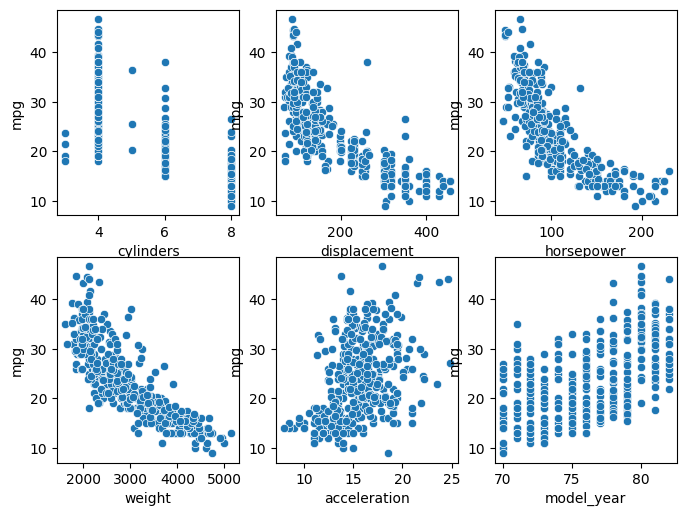

In [62]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

mpg = sns.load_dataset("mpg")
mpg = mpg.dropna()
mpg.head()
#mpg.info()
#mpg.describe()

mpg[["mpg","cylinders", "displacement", "horsepower", "weight", "acceleration",]].describe()

fig, axes = plt.subplots(2, 3, figsize=(8, 6), dpi=100)
for ax, feature in zip(axes.flatten(), mpg.columns[1:7]):
  sns.scatterplot(data=mpg, x=feature, y="mpg", ax = ax)


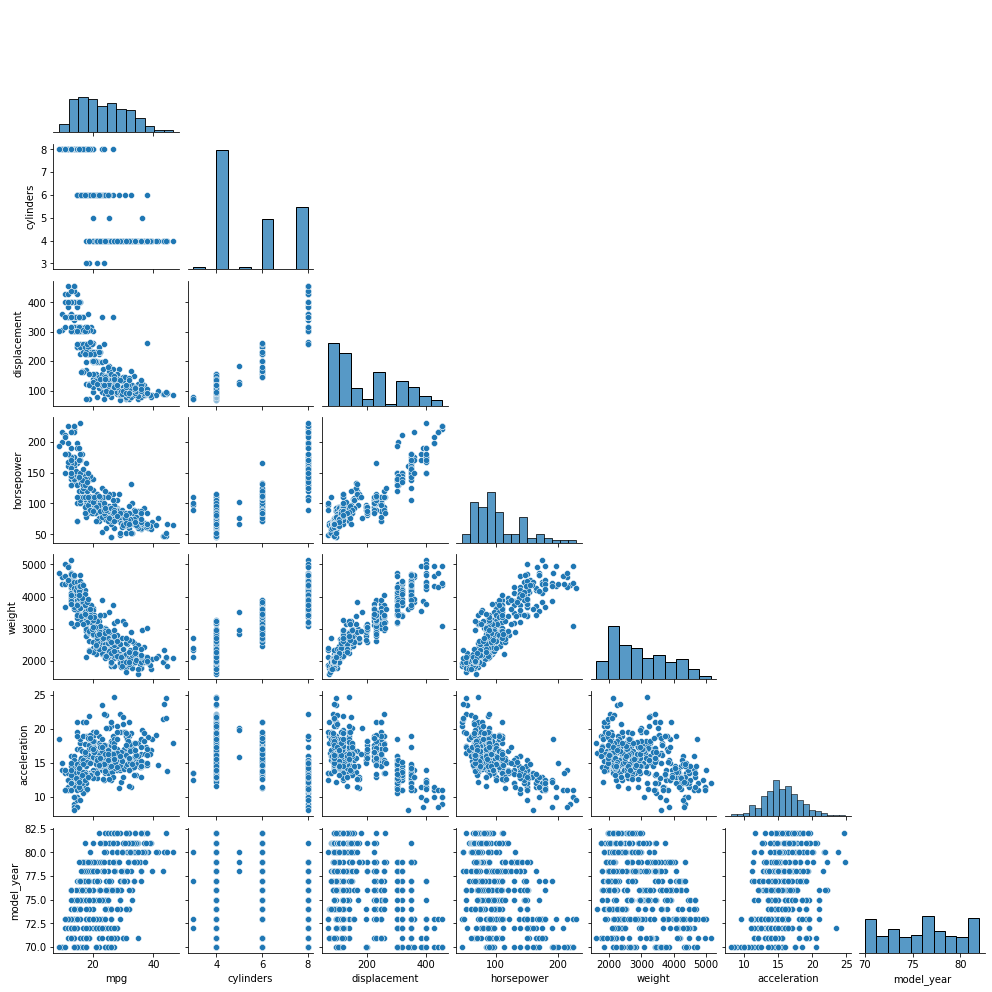

In [63]:
sns.pairplot(mpg, corner=True, height = 2)

In [64]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [65]:
X, y= mpg.drop(["mpg", "origin", "name"], axis=1), mpg["mpg"]
X,y

(     cylinders  displacement  horsepower  weight  acceleration  model_year
 0            8         307.0       130.0    3504          12.0          70
 1            8         350.0       165.0    3693          11.5          70
 2            8         318.0       150.0    3436          11.0          70
 3            8         304.0       150.0    3433          12.0          70
 4            8         302.0       140.0    3449          10.5          70
 ..         ...           ...         ...     ...           ...         ...
 393          4         140.0        86.0    2790          15.6          82
 394          4          97.0        52.0    2130          24.6          82
 395          4         135.0        84.0    2295          11.6          82
 396          4         120.0        79.0    2625          18.6          82
 397          4         119.0        82.0    2720          19.4          82
 
 [392 rows x 6 columns],
 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      1

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(313, 6)
(79, 6)
(313,)
(79,)


In [67]:
X_train.head(), y_train.head()

(     cylinders  displacement  horsepower  weight  acceleration  model_year
 260          6         225.0       110.0    3620          18.7          78
 184          4         140.0        92.0    2572          14.9          76
 174          6         171.0        97.0    2984          14.5          75
 64           8         318.0       150.0    4135          13.5          72
 344          4          86.0        64.0    1875          16.4          81,
 260    18.6
 184    25.0
 174    18.0
 64     15.0
 344    39.0
 Name: mpg, dtype: float64)

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [72]:
from sklearn.linear_model import LinearRegression
model_SVD = LinearRegression()
model_SVD.fit(X_train, y_train)

model_SVD.coef_, model_SVD.intercept_

(array([-0.116173  ,  0.00101347, -0.00227634, -0.00656101,  0.06173551,
         0.76063644]),
 -15.057758585282404)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_SVD = model_SVD.predict(X_test)

mae_SVD = mean_absolute_error(y_test, y_pred_SVD)

mse_SVD = mean_squared_error(y_test, y_pred_SVD)

rmse_SVD = np.sqrt(mse_SVD)

print(f"SVD: MAE {mae_SVD:.2f}, MSE {mse_SVD:.2f}, RMSE {rmse_SVD:.2f}")

SVD: MAE 2.50, MSE 10.50, RMSE 3.24


---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) 

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

In [75]:
model_SVD.fit(scaled_X_train, y_train)

model_SVD.coef_, model_SVD.intercept_

(array([ -0.580865  ,   0.39018741,  -0.41884721, -23.14066817,
          1.03715653,   9.12763733]),
 27.715486259157814)

In [78]:
y_pred_SVD = model_SVD.predict(scaled_X_test)

mae_SVD = mean_absolute_error(y_test, y_pred_SVD)

mse_SVD = mean_squared_error(y_test, y_pred_SVD)

rmse_SVD = np.sqrt(mse_SVD)

print(f"SVD: MAE {mae_SVD:.2f}, MSE {mse_SVD:.2f}, RMSE {rmse_SVD:.2f}")

SVD: MAE 2.50, MSE 10.50, RMSE 3.24


In [77]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter=100000)
model_SGD.fit(scaled_X_train, y_train)

print(f"Weights (beta_hats) {model_SGD.coef_}")
print(f"Intercept {model_SGD.intercept_}")

Weights (beta_hats) [ -2.10443314  -5.08230958   0.08495592 -14.40227554   1.85172299
   9.00744751]
Intercept [26.36834753]



## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---